In [1]:
import numpy as np
import matplotlib.pyplot as plt
E1 = np.load("result/meanE_L32patch_2_emb_size16_hidden_size32rotationTrueangle1.5707964_seed3numsamples256.npy")
E2 = np.load("result/meanE_L16patch_4_emb_size16_hidden_size32rotationTrueangle1.5707964_seed3numsamples256.npy")

FileNotFoundError: [Errno 2] No such file or directory: 'result/meanE_L32patch_2_emb_size16_hidden_size32rotationTrueangle1.5707964_seed3numsamples256.npy'

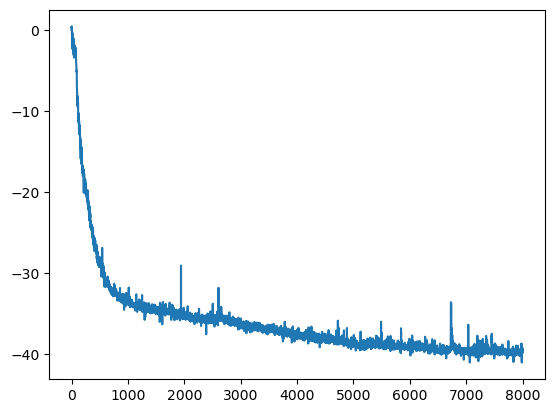

In [6]:
plt.plot(E1.real)

In [40]:
import matplotlib.pyplot as plt
import jax.numpy as jnp
import numpy as np
meanE_middle = np.load("result/meanE_L8_units4_cmi_pattern_decayrotationTrueangle1.413716694115407_seed3_patch1.npy")
meanE_angle = np.load("result/meanE_L8_units4_cmi_pattern_decayrotationTrueangle3.141592653589793_seed3_patch1.npy")
print(meanE_angle.shape)
meanE = np.concatenate((meanE_angle[:2400], meanE_middle, meanE_angle[2400:4800]), axis = 0)
meanE2 = np.load("result/meanE_L8_rnn.npy")


(7200,)


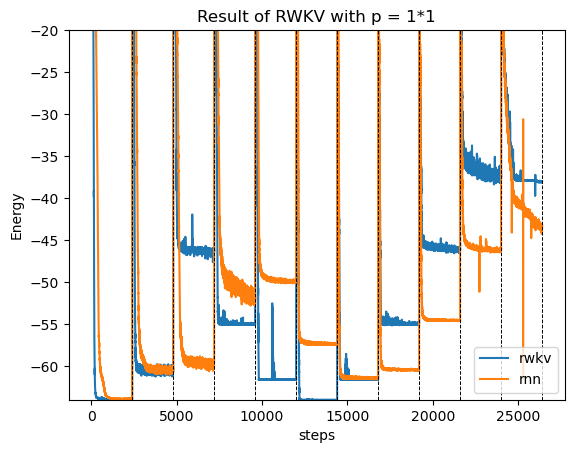

In [47]:
plt.plot(np.arange(meanE.shape[0]), meanE, label = "rwkv")
plt.plot(np.arange(meanE.shape[0]), meanE2[:, :2400].ravel(), label = "rnn")
for i in (np.arange(11)+1)*2400:
    plt.plot([i, i], [-64, -10], 'k--', linewidth=0.7)
plt.ylim(-64, -20)
plt.xlabel("steps")
plt.ylabel("Energy")
plt.title("Result of RWKV with p = 1*1")
plt.legend()
plt.show()

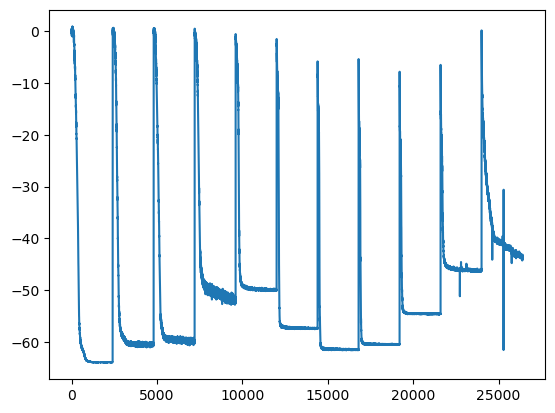

In [3]:
meanE_patch = np.load("result/rwkv_meanE_L4_units4_cmi_pattern_decayrotationTrueangle1.5707963267948966_seed3_patch4.npy")

Text(0.5, 1.0, 'Result of RWKV with p = 2*2')

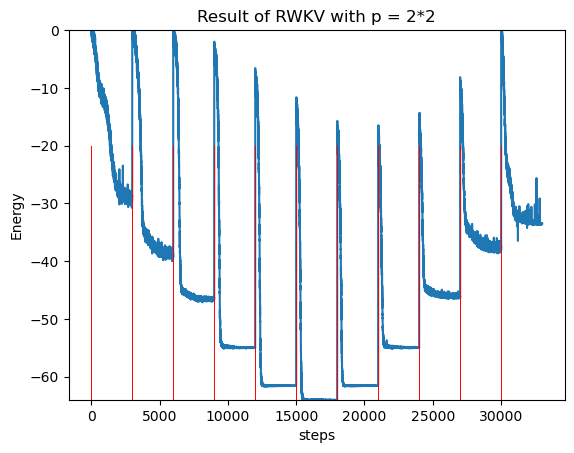

In [30]:
plt.plot(meanE_patch)
for i in jnp.arange(11)*3000:
    plt.plot([i, i], [-64, -20], 'r', linewidth=0.7)
plt.ylim(-64., -0)
plt.xlabel("steps")
plt.ylabel("Energy")
plt.title("Result of RWKV with p = 2*2")

In [31]:
print(meanE_patch[1125])

(-14.303358925008315+0.03962558019748163j)


In [12]:
meanE_patched_rnn = np.load("result/meanE_L4_units32_cmi_pattern_decayrotationTrueangle1.5707963267948966_seed3.npy")
indice_1 = np.arange(11)*6000
indice_2 = np.arange(11)*6000+3000
E = []
for i in range(11):
    E.append(meanE_patched_rnn[indice_1[i]:indice_2[i]])

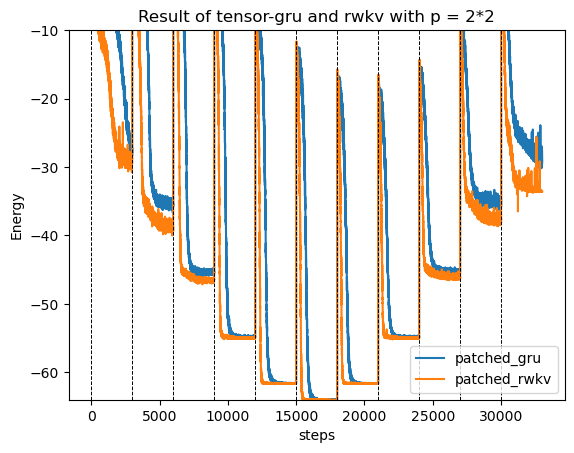

In [24]:
plt.plot(np.array(E).ravel(), label = "patched_gru")
plt.plot(meanE_patch, label = "patched_rwkv")
for i in jnp.arange(11)*3000:
    plt.plot([i, i], [-64, -10], 'k--', linewidth=0.7)
plt.ylim(-64, -10)
plt.xlabel("steps")
plt.ylabel("Energy")
plt.title("Result of tensor-gru and rwkv with p = 2*2")
plt.legend()
plt.show()